In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json 
from sklearn.metrics import roc_curve

In [2]:
INPUT_PATH = "ratings.json"

In [3]:
ratings_dict = json.load(open(INPUT_PATH))
ratings = ratings_dict["ratings_merged"]
probabilities = ratings_dict["probabilities"]

In [4]:
X = np.array(probabilities).reshape(-1, 1)
y = np.array(ratings)

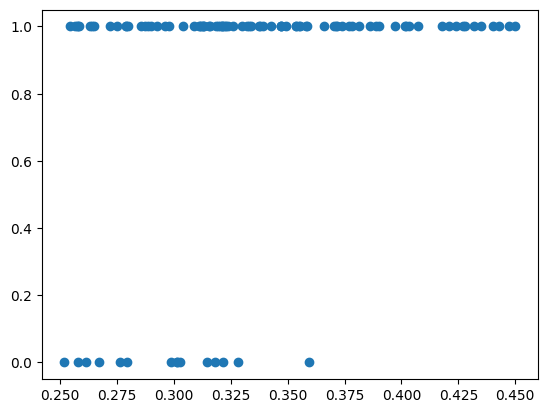

In [5]:
plt.plot(X, y, 'o')

### Threshold detection using changepoint model

Optimal threshold using Change-Point or Threshold model: 0.2542 with loss 0.1400


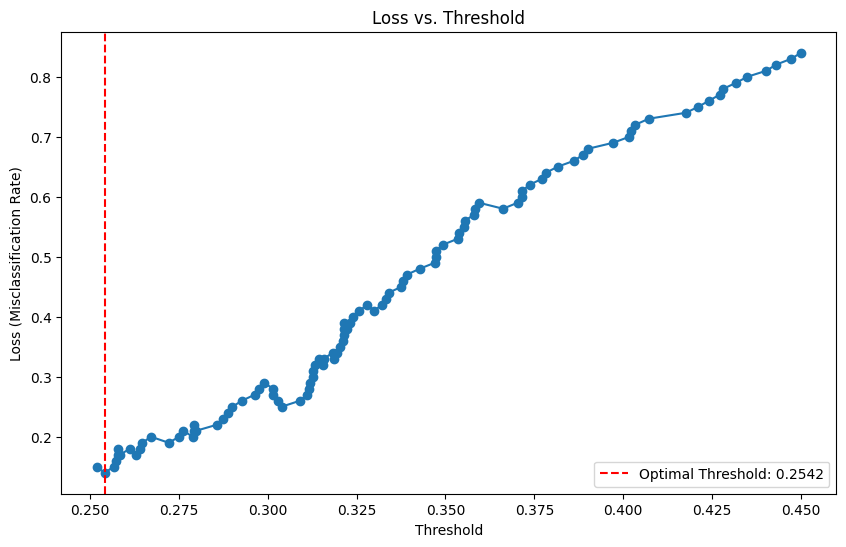

In [6]:
xs = X.ravel()
ys = y.ravel()

candidates = np.unique(xs)
losses = []

for t in candidates:
    pred = (xs >= t).astype(int)
    losses.append(np.mean(pred != ys))

threshold = candidates[np.argmin(losses)]

print(f"Optimal threshold using Change-Point or Threshold model: {threshold:.4f} with loss {min(losses):.4f}")

plt.figure(figsize=(10, 6))
plt.plot(candidates, losses, marker='o')
plt.axvline(x=threshold, color='r', linestyle='--', label=f'Optimal Threshold: {threshold:.4f}')
plt.title('Loss vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Loss (Misclassification Rate)')
plt.legend()

Optimal threshold using ROC curve: 0.3300


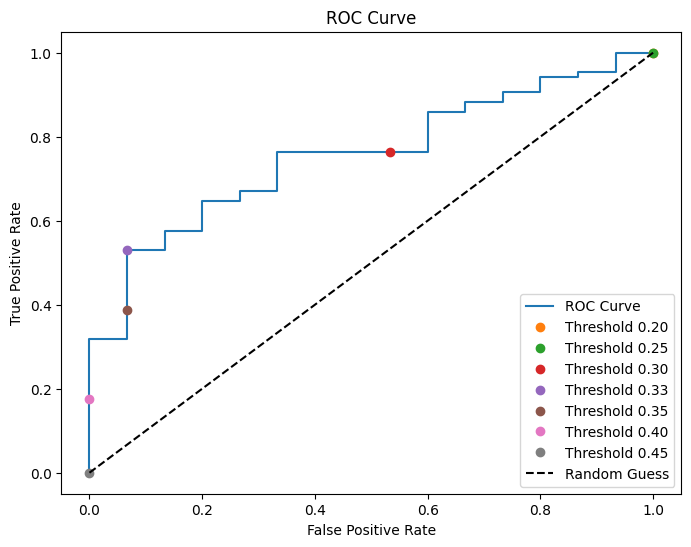

In [7]:
fpr, tpr, thresholds = roc_curve(y, X)
best = np.argmax(tpr - fpr)
threshold = thresholds[best]
print(f"Optimal threshold using ROC curve: {threshold:.4f}")
# plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y, X)
plt.plot(fpr, tpr, label='ROC Curve')
for thresh in [0.2, 0.25, 0.3, threshold, 0.35, 0.4, 0.45]:
    pred = (xs >= thresh).astype(int)
    fpr = np.sum((pred == 1) & (ys == 0)) / np.sum(ys == 0)
    tpr = np.sum((pred == 1) & (ys == 1)) / np.sum(ys == 1)
    plt.plot(fpr, tpr, 'o', label=f'Threshold {thresh:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Outdated: Process disagreements

In [8]:
df = pd.read_csv("../../data/lda/df_30topics10passes.csv")


In [9]:
ns = [len(df[df["topic_19"] >= t]) for t in thresholds]

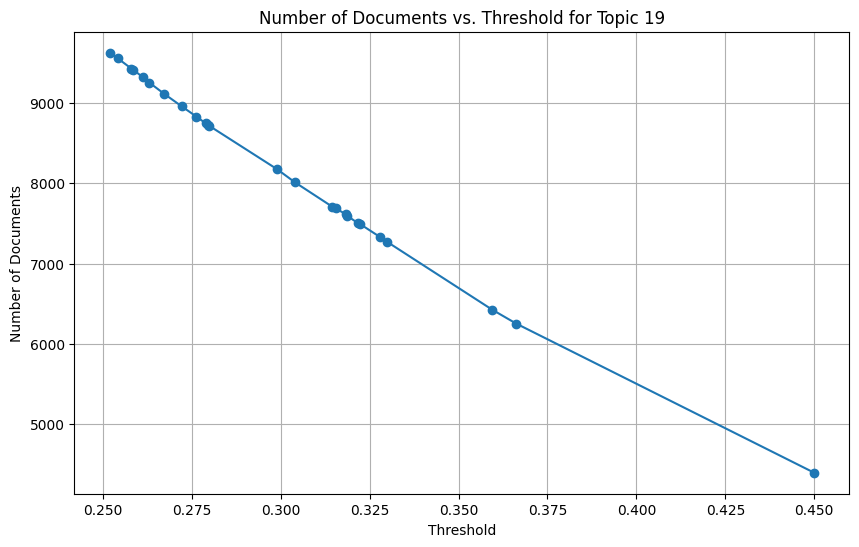

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, ns, marker='o')
plt.title('Number of Documents vs. Threshold for Topic 19')
plt.xlabel('Threshold')
plt.ylabel('Number of Documents')
plt.grid()

<Axes: title={'center': 'Number of documents per year with topic prob > 0.33'}, xlabel='year'>

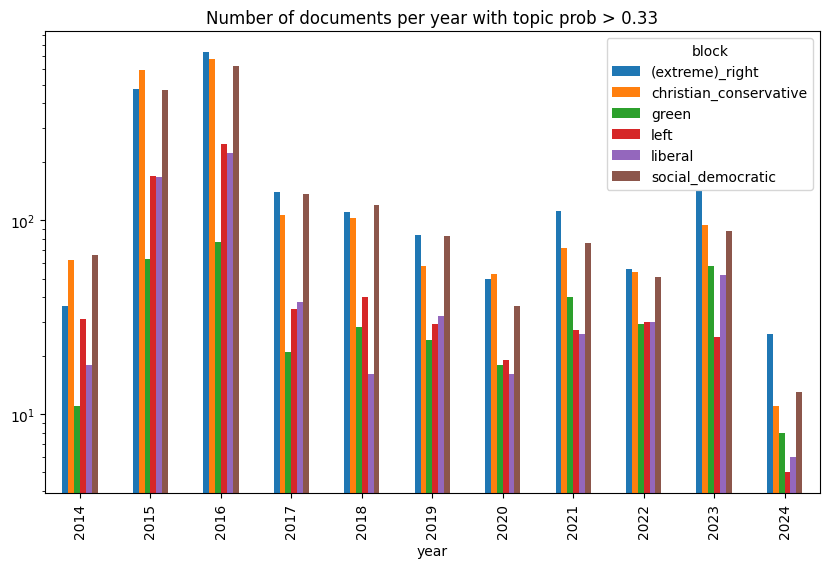

In [36]:

df[df[prob_col] > 0.33].groupby(["year", "block"]).size().unstack().plot.bar(figsize=(10,6), title="Number of documents per year with topic prob > 0.33", logy=True)

In [11]:
topic_id = 19
prob_range = (0.25, 0.45)
n = 100
seed = 42


lower_prob, upper_prob = prob_range
prob_col = f"topic_{topic_id}"
candidates = df[(df[prob_col] >= lower_prob) & (df[prob_col] <= upper_prob)]

sampled = candidates.sample(n=min(n, len(candidates)), random_state=seed).reset_index(drop=True)

In [17]:
import textwrap
thresh_cand = 0.31
for i, r in sampled[(sampled[prob_col] >= thresh_cand) & (np.array(ratings) == 0)].iterrows():
    print(i, r[prob_col])
    print(textwrap.fill(r["translatedText"], width=90))
    print("="*100)

13 0.3183178007602691
The report on the introduction of autonomous emergency trade measures in favor of Tunisia
does not find my vote in favour. However, it is important to exercise protection of
internal products and support those who find themselves facing crises, such as the current
one affecting the oil production sector. In this case the vote is precisely due to a need
for protection.
17 0.321620762348175
The Schengen Convention represents a big step forward in the process of European
integration, allowing the freedom of movement of people within the Union and the
overcoming of the old national border management. Today we find ourselves updating the
Convention as a series of acts forming part of the Schengen acquis are no longer relevant
due to their temporary nature, while others are outdated because their content has been
reformulated by subsequent acts although they have not yet been repealed .
46 0.3144599199295044
Madam President, really, it’s worrisome news what we have hear